In [ ]:
import requests, pandas, numpy
from bs4 import BeautifulSoup
from io import StringIO

### Part 1 Step 1

# Sent a get request and getting the HTML content from the website
# Parsed the HTML looking for the <table> tag
# Constructed a Pandas DataFrame using HTML with the data in the found table

req = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html')

bs = BeautifulSoup(req.content, "html.parser")
html_t = bs.find("table").prettify()

table = pandas.read_html(html_t)
df = table[0]
df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
df

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In [ ]:
### Part 1 Step 2

# Iterate through the DataFrame combining the date with the time to form timestamps
# Set column types to datetime64
# Replaced missing data with 'null' placeholder
# Rearranged DataFrame columns

data = df.drop('movie', axis=1).copy()

for index, row in data.iterrows():
  data.iat[index, 4] = pandas.to_datetime(row['date'] + ' ' + row['start_time'])
  data.iat[index, 5] = pandas.to_datetime(row['date'] + ' ' + row['max_time'])
  data.iat[index, 6] = pandas.to_datetime(row['date'] + ' ' + row['end_time'])

data = data.drop('date', axis=1)

data['start_time'] = data['start_time'].astype('datetime64')
data['max_time'] = data['max_time'].astype('datetime64')
data['end_time'] = data['end_time'].astype('datetime64')

data.replace('-', 'null')

data = data[['rank', 'x_class', 'start_time', 'max_time', 'end_time', 'region']]
data

,rank,x_class,start_time,max_time,end_time,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [ ]:
### Part 1 Step 3

# Sent a get request and getting the HTML content from the website
# Parsed the HTML looking for the <pre> tag where the data is stored
# Split content by rows into array and trim the array to remove unnecessary lines leaving only the raw data
# Removed the unncessary extra text after the PHTX column
# Converted the array into a CSV format using whitespace as the delimiter so that it can be read by pandas using .read_csv() to for the DataFrame

nasa_req = requests.get('https://cmsc320.github.io/files/waves_type2.html')

nasa_bs = BeautifulSoup(nasa_req.content, 'lxml')
nasa_html = nasa_bs.find('pre').contents[0]

nasa_rows = nasa_bs.get_text().split('\n')
nasa_rows = nasa_rows[15: len(nasa_rows) - 3]

for i in range(len(nasa_rows)):
  nasa_rows[i] = nasa_rows[i].split('PHTX', 1)[0]

csv = 'start_date start_time end_date end_time start_frequency end_frequency flare_location flare_region flare_classification cme_date cme_time cme_angle cme_width cme_speed'
for i in range(len(nasa_rows)):
  csv = csv + '\n' + nasa_rows[i]
  
nasa_df = pandas.read_csv(StringIO(csv), delim_whitespace=True)
nasa_df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


In [ ]:
### Part 1 Step 4

# Replaced the missing data placeholders with 'NaN'
# Go through each row of the dataset to check whether or no there is a Halo or lower bound storing the result in two lists.
# Adds the resulting lists as new columns.

# Combined the date and time for 'start_datetime', 'end_datetime', 'cme_datetime'
# In the case of 'end_datetime', some values in 'end_time' are '24:00" which is not an acceptable format for Pandas' datetime datattype.
# As such the '24:00' is converted to '00:00' and the date is incremented by a day.

# Dropped the unnecessary columns and renames the remaining columns.
# Set type of date column, did not cast 'cme_datetime' to datetime type as some rows have 'NaN'.

nasa_data = nasa_df.copy()

nasa_data = nasa_data.replace('-----', 'NaN')
nasa_data = nasa_data.replace('----', 'NaN')
nasa_data = nasa_data.replace('--/--', 'NaN')
nasa_data = nasa_data.replace('--:--', 'NaN')
nasa_data = nasa_data.replace('????', 'NaN')
nasa_data = nasa_data.replace('------', 'NaN')
nasa_data = nasa_data.replace('BACK', 'NaN')
nasa_data = nasa_data.replace('Back', 'NaN')

halo = []
for i, row in nasa_data.iterrows():
  if row['cme_angle'] == 'Halo':
    halo.append(True)
    nasa_data.at[i, 'cme_angle'] = 'NaN'
  else:
    halo.append(False)

nasa_data.insert(14, 'is_halo', halo, True)

lower_bound = []
for i, row in nasa_data.iterrows():
  if '>' in row['cme_width']:
    lower_bound.append(True)
    nasa_data.at[i, 'cme_width'] = row['cme_width'][1:len(row['cme_width'])]
  else:
    lower_bound.append(False)

nasa_data.insert(15, 'is_lower_bound', lower_bound, True)

for i, row in nasa_data.iterrows():
  nasa_data.at[i, 'start_time'] = pandas.to_datetime(row['start_date'] + ' ' + row['start_time'])

  if row['end_time'] == '24:00':
    nasa_data.at[i, 'end_time'] = pandas.to_datetime(row['start_date'][0:4] + '/' + row['end_date'] + ' ' + '00:00') + pandas.DateOffset(1)
  else:
    nasa_data.at[i, 'end_time'] = pandas.to_datetime(row['start_date'][0:4] + '/' + row['end_date'] + ' ' + row['end_time'])

  if row['cme_date'] != 'NaN':
    nasa_data.at[i, 'cme_time'] = pandas.to_datetime(row['start_date'][0:4] + '/' + row['cme_date'] + ' ' + row['cme_time'])

nasa_data = nasa_data.drop(columns=['start_date', 'end_date', 'cme_date'])
nasa_data = nasa_data.rename(columns={'start_time': 'start_datetime', 'end_time': 'end_datetime', 'cme_time': 'cme_datetime'})

nasa_data['start_datetime'] = nasa_data['start_datetime'].astype('datetime64')
nasa_data['end_datetime'] = nasa_data['end_datetime'].astype('datetime64')

nasa_data

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,is_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


In [ ]:
### Part 2 Question 1

# Filters the DataFrame for all flares with 'X' in its classification.
# Creates a temporary table extracting the numerical value after the 'X' and sorts the temporary column by descending order.
# Drop the temporary columns and take the top 50.

sf50 = nasa_data[nasa_data['flare_classification'].str.contains('X')].copy()
sf50['temp'] = sf50['flare_classification']
sf50['temp'] = sf50['temp'].apply(lambda x: float(x[1:]))
sf50.sort_values(['temp'], ascending=False, inplace=True)
sf50 = sf50.drop('temp', 1).head(50)

sf50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,is_lower_bound
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,False
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False


I was not able to replicate SpaceWeatherLive's data exactly row for row. The first few rows of my output were similar to SpaceWeatherLive's data, but as I went down the list I noticed my data produced a minumum classification of X1.9 whereas their data stopped at X2.6.

In [ ]:
### Part 2 Question 2

# Created a temporary column 'x_class' for the top 50 data that was obtained as a result from Part 2 Question 1.
# Removed all occurences of 'X' and '+' leaving only the numerical value in the 'x_class' column for both SpaceWeatherLive's and NASA's Top 50's data.
# Converted SpaceWeatherLive's region code following the pattern in the text explanation below.
# Created a new 'rank' column, matched the two datasets, and set value inside 'rank' column according matched rows.

match_data = sf50.copy()
match_data['x_class'] = match_data['flare_classification'].apply(lambda x: float(x[1:]))
sf_temp = data.copy()
sf_temp['x_class'] = sf_temp['x_class'].apply(lambda x: x[:-1] if ('+' in x) else x)
sf_temp['x_class'] = sf_temp['x_class'].apply(lambda x: float(x[1:]))
sf_temp['region'] = sf_temp['region'].apply(lambda x: '10' + str(x) if len(str(x)) == 3 else ('100' + str(x) if len(str(x)) == 2 else x))
match_data['rank'] = ''

for i, nasa_row in match_data.iterrows():
  for j, sf_row in sf_temp.iterrows():
    if str(match_data.at[i, 'x_class']) == str(sf_temp.at[j, 'x_class']) and \
    str(match_data.at[i, 'flare_region']) == str(sf_temp.at[j, 'region']) and \
    pandas.to_datetime(match_data.at[i, 'start_datetime']).normalize() == pandas.to_datetime(sf_temp.at[j, 'start_time']).normalize():
      match_data.at[i, 'rank'] = sf_temp.at[j, 'rank']

match_data = match_data.drop('x_class', axis=1)
match_data[match_data['rank'] != ''].sort_values('rank')

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,is_lower_bound,rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,2
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False,6
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,7
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,False,9
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,10
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,True,False,12
331,2006-12-06 19:00:00,2006-12-09 00:00:00,16000,30,S05E64,10930,X6.5,NaN,NaN,NaN,NaN,False,False,14
317,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257,True,False,15
82,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360,1674,True,False,17


I chose to match the NASA data with the SpaceWeatherLive data with flare classification, region, and starting date. Before matching, I noticed a pattern between the SpaceWeatherLive regions and the NASA region. For all SpaceWeatherLive regions represented with 3 or 2 digits, adding '10' and '100' in front the region numbers respectively results in a matching region number in NASA's data. I wrote a simple funcion to convert SpaceWeatherLive's region number format into NASA's and matched the two tables. My match criterion resulted in 24 total matches.

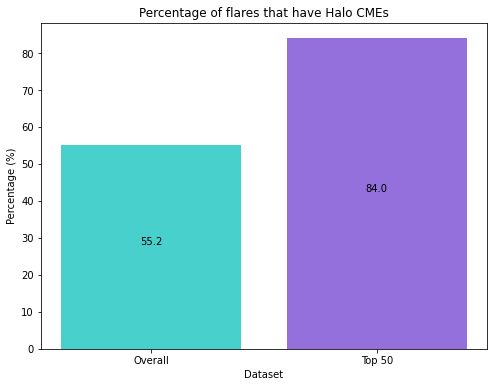

In [ ]:
### Part 2 Step 3

# Created two counters counting the number of Halos in the top 50 and the entire NASA dataset
# Found the percentage of Halos in both data by dividing the two counts by number of rows for each datasets and multiplying by 100.
# Used matplotlib to plot the bar graphs.

import matplotlib.pyplot as plt

sf_halo = 0
for i, row in sf50.iterrows():
  if sf50.at[i, 'is_halo'] == True:
    sf_halo += 1

nasa_halo = 0
for i, row in nasa_data.iterrows():
  if nasa_data.at[i, 'is_halo'] == True:
    nasa_halo += 1

fig = plt.figure(figsize = (8, 6))
category = ['Overall', 'Top 50']
values = [(nasa_halo/len(nasa_data)) * 100, (sf_halo/len(sf_temp)) * 100]
bar = plt.bar(category, values, color = ['mediumturquoise', 'mediumpurple'])
plt.title('Percentage of flares that have Halo CMEs')
plt.xlabel('Dataset')
plt.ylabel('Percentage (%)')
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{height:.1f}', ha='center', va='bottom')

plt.show()

The intent of my plot is to show given the overall dataset as well as the top 50 solar flares, which data has a higher proportion of having Halo CMEs.
The plot above shows a bar graph with two bars; the turquois bar represents the percentage of flares that have Halo CMEs for the overall NASA dataset, and the purple one represents percentage for the top 50 solar flares.
As shown, approximately 55.2% of the solar flares in the overall NASA dataset have Halo CMEs compared to 84% in the top 50 solar flares. From the bar graph, we can see that the top 50 solar flares have a higher chance of having Halo CMEs and that there may be a correlation between solar flare classification and their likelihood of having Halo CMEs that can be further studied.